INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


Total number of spikes : 18
# of neuron in the network : 6250


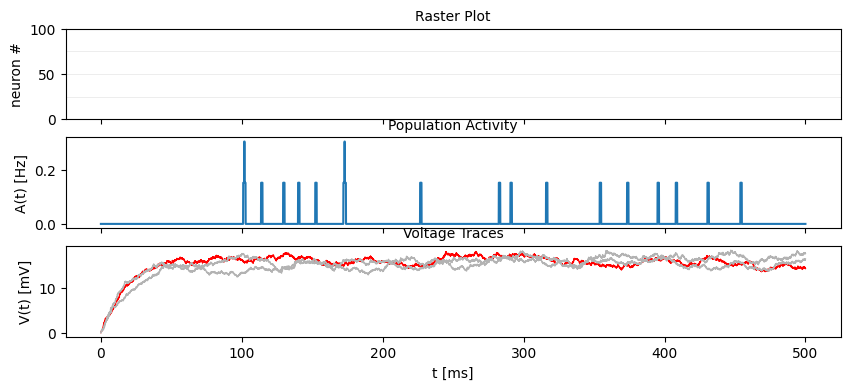

In [2]:
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools
from neurodynex3.tools import spike_tools
import brian2 as b2
import matplotlib.pyplot as plt

# Default parameter of a single LIF neuron
V_REST = 0. * b2.mV
V_RESET = +10. * b2.mV
FIRING_THRESHOLD = +20. * b2.mV
MEMBRANE_TIME_SCALE = 20. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

# Default parameters of the network
SYNAPTIC_WEIGHT_W0 = 0.1 * b2.mV  # note: w_ee=w_ie = w0 and = w_ei=w_ii = -g*w0
RELATIVE_INHIBITORY_STRENGTH_G = 4.  # balanced
CONNECTION_PROBABILITY_EPSILON = 0.1
SYNAPTIC_DELAY = 1.5 * b2.ms
#POISSON_INPUT_RATE = 12. * b2.Hz # vthr =10
POISSON_INPUT_RATE = 8 * b2.Hz #
N_POISSON_INPUT = 1000


rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=500. * b2.ms, poisson_input_rate=POISSON_INPUT_RATE)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)

print("Total number of spikes : {}".format(spike_monitor.num_spikes))
print("# of neuron in the network : {}".format(spike_monitor.source.N))

plt.show()

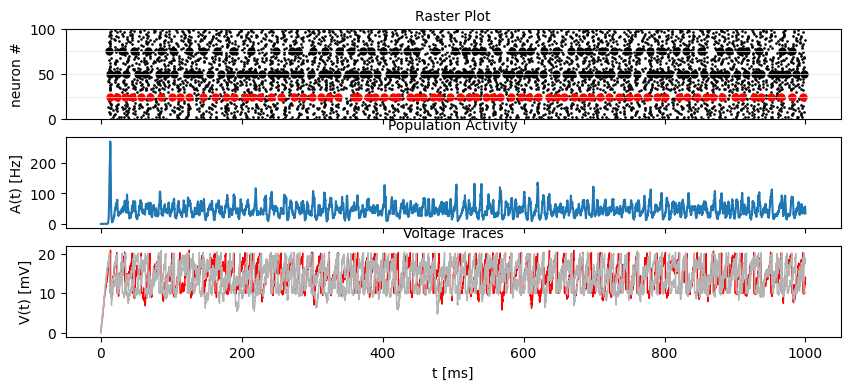

Total number of spikes :  355511


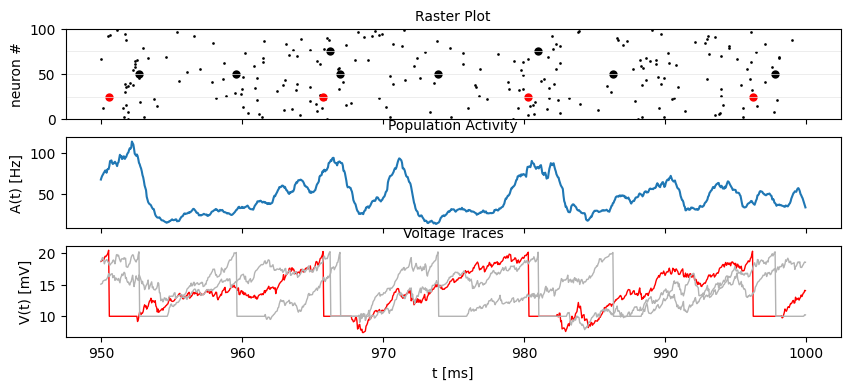

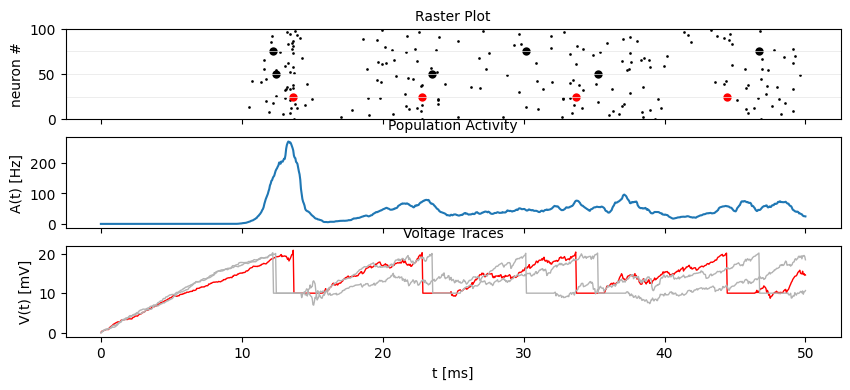

355511
355511
CV= 0.7419204891734709


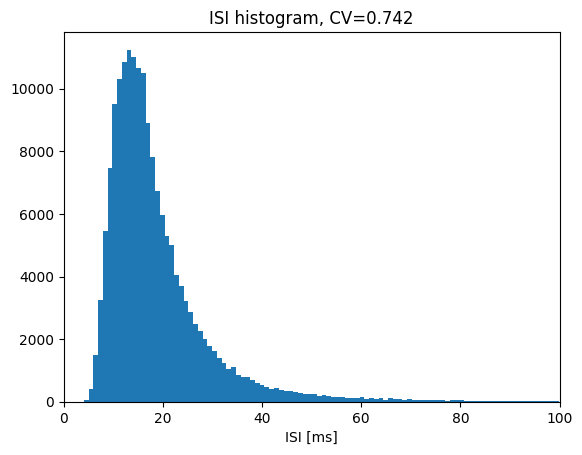

In [9]:
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools
from neurodynex3.tools import spike_tools
import brian2 as b2
import matplotlib.pyplot as plt

# Default parameter of a single LIF neuron
V_REST = 0. * b2.mV
V_RESET = +10. * b2.mV
FIRING_THRESHOLD = +20. * b2.mV
MEMBRANE_TIME_SCALE = 20. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

# Default parameters of the network
SYNAPTIC_WEIGHT_W0 = 0.1 * b2.mV  # note: w_ee=w_ie = w0 and = w_ei=w_ii = -g*w0
RELATIVE_INHIBITORY_STRENGTH_G = 4.  # balanced
CONNECTION_PROBABILITY_EPSILON = 0.1
SYNAPTIC_DELAY = 1.5 * b2.ms
POISSON_INPUT_RATE = 12. * b2.Hz # vthr default
N_POISSON_INPUT = 1000

#RELATIVE_INHIBITORY_STRENGTH_G = 0.1 

# For SR
# RELATIVE_INHIBITORY_STRENGTH_G = 1.  
# POISSON_INPUT_RATE = 20.0 * b2.Hz 

# For SI-fast
# RELATIVE_INHIBITORY_STRENGTH_G = 6.  
# POISSON_INPUT_RATE = 40. * b2.Hz 
# early time에서 synchronize 되는 것을 확인할 수 있다.

# For AI
RELATIVE_INHIBITORY_STRENGTH_G = 5.  
POISSON_INPUT_RATE = 20.0 * b2.Hz 
# 푸아송 분포와 같은 값을 갖는다.

# For SI-slow
# RELATIVE_INHIBITORY_STRENGTH_G = 4.5 
# POISSON_INPUT_RATE = 9.0 * b2.Hz 
# slow한 영역에서 synchronize 된다.

#inhibitory의 값이 없을 때를 실험해보면 synchronize가 더 잘된다는걸 확인할 수 있다.
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=1000. * b2.ms, N_Excit=6000, N_Inhib=1500, poisson_input_rate=POISSON_INPUT_RATE,g=RELATIVE_INHIBITORY_STRENGTH_G, N_extern = 1000)

plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)
plt.show()
print("Total number of spikes : ",format(spike_monitor.num_spikes))
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=950.*b2.ms)
plt.show()
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx,t_min=0.*b2.ms, t_max=50.*b2.ms)
plt.show()


print(spike_tools.get_spike_train_stats(spike_monitor).nr_spikes)

spike_stats=spike_tools.get_spike_train_stats(spike_monitor,window_t_min=500*b2.ms) # looks not working...
print(format(spike_stats.nr_spikes))
print("CV=",format(spike_stats.CV))

plot_tools.plot_ISI_distribution(spike_stats, hist_nr_bins=100, xlim_max_ISI= 100 *b2.ms)
plt.show()


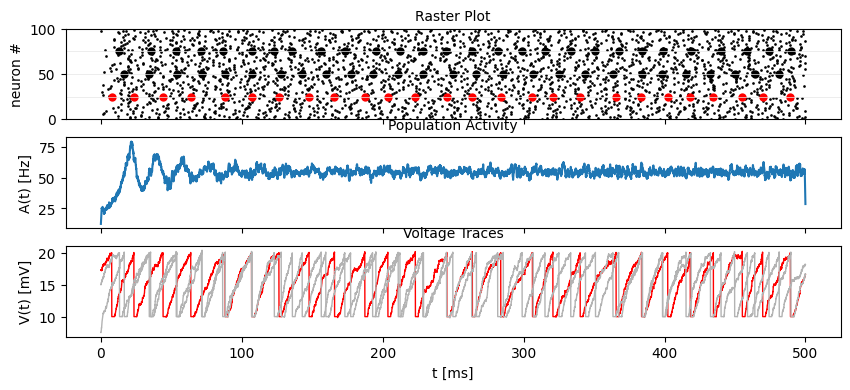

Total number of spikes :  202689


In [12]:
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools
from neurodynex3.tools import spike_tools
import brian2 as b2
import matplotlib.pyplot as plt

# Default parameter of a single LIF neuron
V_REST = 0. * b2.mV
V_RESET = +10. * b2.mV
FIRING_THRESHOLD = +20. * b2.mV
MEMBRANE_TIME_SCALE = 20. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

# Default parameters of the network
SYNAPTIC_WEIGHT_W0 = 0.1 * b2.mV  # note: w_ee=w_ie = w0 and = w_ei=w_ii = -g*w0
RELATIVE_INHIBITORY_STRENGTH_G = 4.  # balanced
CONNECTION_PROBABILITY_EPSILON = 0.1
SYNAPTIC_DELAY = 1.5 * b2.ms
POISSON_INPUT_RATE = 12. * b2.Hz # vthr default
#POISSON_INPUT_RATE = 10 * b2.Hz # vthr 
N_POISSON_INPUT = 1000

# For SI-slow
RELATIVE_INHIBITORY_STRENGTH_G = 2.5
POISSON_INPUT_RATE = 14.0 * b2.Hz 

# simulation time을 바꿔가며 확인해본 결과
# rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=50. * b2.ms, N_Excit=6000, N_Inhib=1500, poisson_input_rate=POISSON_INPUT_RATE,g=RELATIVE_INHIBITORY_STRENGTH_G)
# rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=50. * b2.ms, N_Excit=6000, N_Inhib=1500, poisson_input_rate=POISSON_INPUT_RATE,g=RELATIVE_INHIBITORY_STRENGTH_G,w0=0.0*b2.mV, w_external=1.0*b2.mV)
#rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=50. * b2.ms, N_Excit=6000, N_Inhib=1500, poisson_input_rate=POISSON_INPUT_RATE,g=RELATIVE_INHIBITORY_STRENGTH_G,w0=0.0*b2.mV, w_external=1.00*b2.mV, random_vm_init=True) # looks not working almost similar with before using random vm...

# 처음에는 synchronzie 되다가 나중에는 random하게 나온다.
# rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=500. * b2.ms, N_Excit=6000, N_Inhib=1500, poisson_input_rate=POISSON_INPUT_RATE, g=RELATIVE_INHIBITORY_STRENGTH_G, w0=0.0*b2.mV, w_external=LIF_spiking_network.SYNAPTIC_WEIGHT_W0) # looks not working almost similar with before using random vm...
# random하게 input을 부여하면 synchronize가 나와야하는데 안나온다.
# rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=500. * b2.ms, random_vm_init=True, N_Excit=6000, N_Inhib=1500, poisson_input_rate=POISSON_INPUT_RATE, g=RELATIVE_INHIBITORY_STRENGTH_G, w0=0.0*b2.mV, w_external=LIF_spiking_network.SYNAPTIC_WEIGHT_W0) # looks not working almost similar with before using random vm...

plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)
plt.show()
print("Total number of spikes : ",format(spike_monitor.num_spikes))
#plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=950.*b2.ms)
#plt.show()

In [18]:
import numpy as np
def get_population_activity_power_spectrum2(
        rate_monitor, delta_f, k_repetitions, T_init=100*b2.ms, subtract_mean_activity=False):
    """
    Computes the power spectrum of the population activity A(t) (=rate_monitor.rate)

    Args:
        rate_monitor (RateMonitor): Brian2 rate monitor. rate_monitor.rate is the signal being
            analysed here. The temporal resolution is read from rate_monitor.clock.dt
        delta_f (Quantity): The desired frequency resolution.
        k_repetitions (int): The data rate_monitor.rate is split into k_repetitions which are FFT'd
            independently and then averaged in frequency domain.
        T_init (Quantity): Rates in the time interval [0, T_init] are removed before doing the
            Fourier transform. Use this parameter to ignore the initial transient signals of the simulation.
        subtract_mean_activity (bool): If true, the mean value of the signal is subtracted. Default is False

    Returns:
        freqs, ps, average_population_rate
    """
    data = rate_monitor.rate/b2.Hz
    delta_t = rate_monitor.clock.dt
    f_max = 1./(2. * delta_t)
    N_signal = int(2 * f_max / delta_f)
    T_signal = N_signal * delta_t
    N_init = int(T_init/delta_t)
    N_required = k_repetitions * N_signal + N_init
    N_data = len(data)

    # print("N_data={}, N_required={}".format(N_data,N_required))
    if (N_data < N_required):
        err_msg = "Inconsistent parameters. k_repetitions require {} samples." \
                  " rate_monitor.rate contains {} samples.".format(N_required, N_data)
        raise ValueError(err_msg)
    if N_data > N_required:
        # print("drop samples")
        data = data[:N_required]
    # print("length after dropping end:{}".format(len(data)))
    data = data[N_init:]
    # print("length after dropping init:{}".format(len(data)))
    average_population_rate = np.mean(data)
    if subtract_mean_activity:
        data = data - average_population_rate
    average_population_rate *= b2.Hz
    data = data.reshape(k_repetitions, N_signal)  # reshape into one row per repetition (k)
    k_ps = np.abs(np.fft.fft(data))**2
    ps = np.mean(k_ps, 0)
    # normalize
    ps = ps * delta_t / N_signal  # TODO: verify: subtract 1 (N_signal-1)?
    freqs = np.fft.fftfreq(N_signal, delta_t)
    ps = ps[:int(N_signal/2)]
    freqs = freqs[:int(N_signal/2)]
    return freqs, ps, average_population_rate

In [19]:
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools, spike_tools
import brian2 as b2
import matplotlib.pyplot as plt

# Specify the parameters of the desired network state (e.g. SI fast)
poisson_rate = 20.0 *b2.Hz
g = 3
CE = 5000

# Specify the signal and simulation properties:
delta_t = 0.1 * b2.ms
delta_f = 5.0 * b2.Hz
T_init = 100.0 * b2.ms
k = 5

# compute the remaining values:
f_max = 5000.0 * b2.Hz
N_samples = 5000
T_signal = 500.0 * b2.ms
T_sim = k * T_signal + T_init

# replace the XXXX by appropriate values:

print("Start simulation. T_sim={}, T_signal={}, N_samples={}".format(T_sim, T_signal, N_samples))
b2.defaultclock.dt = delta_t
# for technical reason (solves rounding issues), we add a few extra samples:
stime = T_sim + (10 + k) * b2.defaultclock.dt
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = \
    LIF_spiking_network.simulate_brunel_network(
        N_Excit=CE, poisson_input_rate=poisson_rate, g=g, sim_time=stime)

#plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor,spike_train_idx_list=monitored_spike_idx, t_min=0*b2.ms)
#plt.show()
#plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor,spike_train_idx_list=monitored_spike_idx, t_min=T_sim - 100 *b2.ms)
#plt.show()
#spike_stats = spike_tools.get_spike_train_stats(spike_monitor, window_t_min= T_init)
#plot_tools.plot_ISI_distribution(spike_stats, hist_nr_bins= 100, xlim_max_ISI= 100 *b2.ms)
#plt.show()

##  Power Spectrum => looks not working...
pop_freqs, pop_ps, average_population_rate = get_population_activity_power_spectrum2(rate_monitor, delta_f, k, T_init) # This part is not working, Have no idea...
#pop_freqs, pop_ps, average_population_rate = spike_tools.get_population_activity_power_spectrum(rate_monitor, delta_f, k, 100.0*b2.ms)
#plot_tools.plot_population_activity_power_spectrum(pop_freqs, pop_ps, 1 *b2.Hz, average_population_rate)
#plt.show()
#freq, mean_ps, all_ps, mean_firing_rate, all_mean_firing_freqs = \
#    spike_tools.get_averaged_single_neuron_power_spectrum(
#        spike_monitor, sampling_frequency=1./delta_t, window_t_min= T_init,
#        window_t_max=T_sim, nr_neurons_average= XXXX )
#plot_tools.plot_spike_train_power_spectrum(freq, mean_ps, all_ps, max_freq= XXXX * b2.Hz,
#                                           mean_firing_freqs_per_neuron=all_mean_firing_freqs,
#                                           nr_highlighted_neurons=2)
print("done")


Start simulation. T_sim=2.6, T_signal=0.5, N_samples=5000
done
